In [17]:
import pandas_datareader.data as web
import datetime
import yfinance as yf
# yf.pdr_override()

start=datetime.datetime(2008, 1, 1)
end=datetime.datetime.today()
apple=web.get_data_yahoo('600036.SS',start,end)
apple.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-10,35.740002,34.750000,35.709999,35.000000,67533066.0,35.000000
2019-09-11,35.240002,34.709999,35.189999,35.049999,60908940.0,35.049999
2019-09-12,35.430000,34.970001,35.400002,35.290001,52582171.0,35.290001
2019-09-16,35.540001,34.820000,35.500000,35.000000,46166805.0,35.000000
2019-09-17,35.180000,34.619999,35.070000,34.700001,40907776.0,34.700001


In [14]:
apple.tail()

NameError: name 'NDX' is not defined

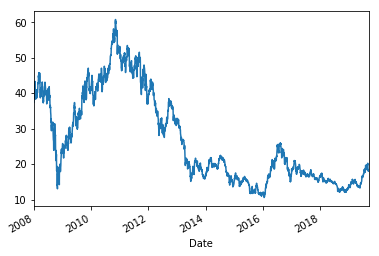

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
apple['Close'].plot()
plt.show()

In [22]:
SAP.to_csv("REALLONGTERM.CSV",index=True, header=True)

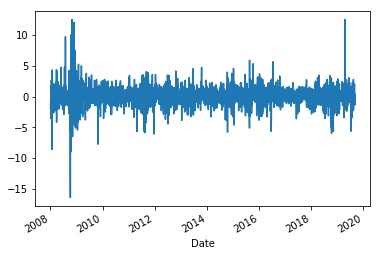

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5206.19238728
Iteration:      2,   Func. Count:     15,   Neg. LLF: 5205.44782196
Iteration:      3,   Func. Count:     24,   Neg. LLF: 5205.16609339
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5203.4457523
Iteration:      5,   Func. Count:     41,   Neg. LLF: 5202.94521095
Iteration:      6,   Func. Count:     48,   Neg. LLF: 5202.45218084
Iteration:      7,   Func. Count:     54,   Neg. LLF: 5202.28164924
Iteration:      8,   Func. Count:     60,   Neg. LLF: 5202.25645484
Iteration:      9,   Func. Count:     66,   Neg. LLF: 5202.25632277
Iteration:     10,   Func. Count:     72,   Neg. LLF: 5202.25631508
Iteration:     11,   Func. Count:     78,   Neg. LLF: 5202.25631385
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5202.25631385
            Iterations: 11
            Function evaluations: 78
            Gradient evaluations: 11
                     Constant Mean - GARCH Mode

In [21]:
import datetime as dt
import sys
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from arch import arch_model

# start = dt.datetime(2015,1,1)
# end = dt.datetime(2018,1,1)

# NDX['close'] = NDX['Index Value']

returns = 100 * NDX['Close'].pct_change().dropna()
returns.plot()
plt.show()

from arch import arch_model
model=arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

# forecasts = results.forecast(horizon=30, method='simulation', simulations=100)
# sims = forecasts.simulations

# print(np.percentile(sims.values[-1,:,-1].T,5))
# plt.hist(sims.values[-1, :,-1],bins=50)
# plt.title('Distribution of Returns')
# plt.show()
print(results.loglikelihood)

In [28]:
def VaR_Monte_FHS(num,p,sigma_first,ndays,omega,alpha,beta,theta):
    np.random.seed(4)
    MC = num
    sigma2_FHS = sigma_first
    data_FHS = pd.DataFrame(index = range(MC))
    data_FHS_R = pd.DataFrame(index = range(MC))
    data_FHS['z_day1'] = data.loc[np.random.randint(0,data.shape[0]-1,MC),'z_Garch'].values
    data_FHS_R['R_day1'] = sigma2_Garch**0.5 * data_FHS['z_day1']
    data_FHS['sigma2_day1'] = omega + alpha*(data_FHS_R['R_day1'] - theta*sigma2_FHS**0.5)**2  + beta*sigma2_FHS

    # 低2-10天公式一样，循环
    for i in range(2,ndays +1):
        exec("data_FHS['z_day" + str(i) + "'] = data.loc[np.random.randint(0,data.shape[0]-1,MC),'z_Garch'].values")
        exec("data_FHS_R['R_day" + str(i) + "'] = data_FHS['sigma2_day" + str(i-1) + "']**0.5 * data_FHS['z_day" + str(i) + "']")
        exec("data_FHS['sigma2_day" + str(i) + "'] = omega + alpha*(data_FHS_R['R_day" + str(i) + "'] - theta*data_FHS['sigma2_day" + str(i -1) + "']**0.5)**2 + beta*data_FHS['sigma2_day" + str(i-1) + "']")

    VaR = pd.DataFrame(index = range(ndays))
    VaR['ndays'] = np.arange(1,ndays+1)
    VaR['VaR'] = 0
    for i in range(ndays):
        R_ndays = data_FHS_R.iloc[:,:i+1].sum(axis = 1)
        VaR.loc[i,'VaR'] = - np.percentile(R_ndays,p) 
    return VaR

def VaR_MC(returns, S, start, end,c ,period, iterations):
    
    
    mu = returns.mean()
    sigma =returns.std()
    
    z = np.random.normal(0, 1, [1, iterations])
    
    ST = S*np.exp(period*(mu - 0.5*sigma**2)+sigma*np.sqrt(period)*z)
    
    ST = np.sort(ST)
    
    Spc = np.percentile(ST,(1-c)*100)
    
    var = S - Spc
    
    
    print('\n')
    print('Stock: {}'.format(stock[0]))
    print('Mu over {} days:'.format(period), mu*period)
    print('Sigma over {} days:'.format(period), sigma*np.sqrt(period))
    
    print('Monte Carlo VaR for {} with confidence {} over period of {} days: '.format(stock[0],c,period),  var)
stock = ['SAP']
s=100
c=0.99
period =1
iterations = 10000000


VaR_MC(returns, s, start, end,c ,period, iterations)



Stock: SAP
('Mu over 1 days:', 0.049117474655217444)
('Sigma over 1 days:', 1.5176955642513446)
('Monte Carlo VaR for SAP with confidence 0.99 over period of 1 days: ', 99.02716961589906)
